## Setup

In [26]:
install.packages('ggpubr')
install.packages('factoextra')
install.packages('geosphere')

Warning message:
"package 'ggpubr' is in use and will not be installed"
Warning message:
"package 'factoextra' is in use and will not be installed"
Installing package into 'C:/Users/Saqeeb/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'geosphere' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Saqeeb\AppData\Local\Temp\Rtmp4Oy5dw\downloaded_packages


In [218]:
set.seed(123)

x=c(5.9,4.6,6.2,4.7,5.5,5.0,4.9,6.7,5.1,6.0 )

y=c(3.2,2.9,2.8,3.2,4.2,3.0,3.1,3.1,3.8,3.0)
df <- data.frame(x,y)

k = kmeans(df, centers=3, nstart=25)



In [219]:
library(ggpubr)

library(factoextra)


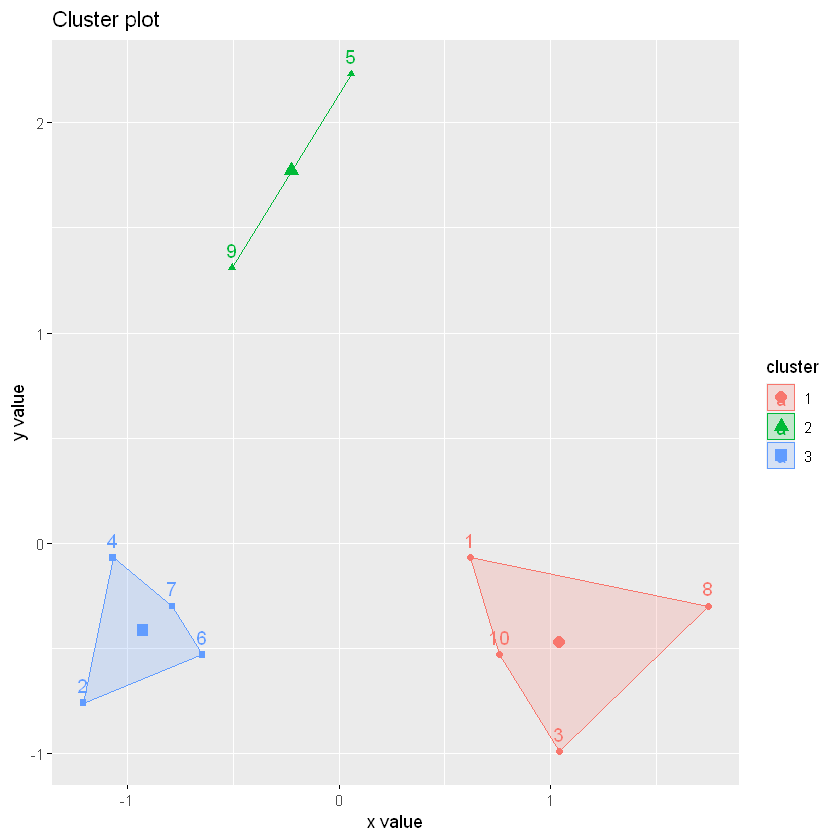

In [220]:
fviz_cluster(k, data = df)

## First iteriation

In [151]:
a=c(6.2,3.2)
b=c(6.6,3.7)
d=c(6.5,3.0)

In [152]:
euclidean <- function(x, y, z, v) (z - x)^2+(v - y)^2


In [153]:
t = x
q = y

In [155]:
library(tibble)

In [156]:
euc=data.frame(red= euclidean(t, q,a[1],a[2]), green= euclidean(t,q,b[1],b[2]), blue= euclidean(t,q,d[1],d[2]))
euc<- euc %>% mutate(
    x,
    y,
    closest= ifelse(
        red<green & red<blue, 'red',
        ifelse(
        red>green & green<blue, 'green',
        'blue'))
    
)

euc<- as.data.frame(euc)

euc

red,green,blue,x,y,closest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.09,0.74,0.40,5.9,3.2,red
2.65,4.64,3.62,4.6,2.9,red
0.16,0.97,0.13,6.2,2.8,blue
2.25,3.86,3.28,4.7,3.2,red
1.49,1.46,2.44,5.5,4.2,green
1.48,3.05,2.25,5.0,3.0,red
1.70,3.25,2.57,4.9,3.1,red
0.26,0.37,0.05,6.7,3.1,blue
1.57,2.26,2.60,5.1,3.8,red


In [161]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.0.4"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [193]:
euc_red <- subset(euc, closest == "red")
euc_red <- select(euc_red,x,y)


euc_blu <- subset(euc, closest == "blue")
euc_blu <- select(euc_blu,x,y)


euc_grn <- subset(euc, closest == "green")
euc_grn <- select(euc_grn,x,y)


,x,y
3,6.2,2.8
8,6.7,3.1


In [206]:
z= (6.2 + 6.7)/2
g= (2.8 + 3.1)/2
blu <- c(z,g)
blu

[1] 6.45 2.95

In [224]:
a = as.double(centroid(euc_red))
b1 = as.double(blu)
d = as.double(euc_grn)

ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'


In [208]:
euc=data.frame(red= euclidean(t, q,a[1],a[2]), green= euclidean(t,q,b[1],b[2]), blue= euclidean(t,q,d[1],d[2]))
euc<- euc %>% mutate(
    x,
    y,
    closest= ifelse(
        red<green & red<blue, 'red',
        ifelse(
        red>green & green<blue, 'green',
        'blue'))
    
)

euc<- as.data.frame(euc)

euc

red,green,blue,x,y,closest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.5311764,0.365,1.16,5.9,3.2,green
0.4804183,3.425,2.50,4.6,2.9,red
1.2836754,0.085,2.45,6.2,2.8,green
0.2340231,3.125,1.64,4.7,3.2,red
0.9415985,2.465,0.00,5.5,4.2,blue
0.1124167,2.105,1.69,5.0,3.0,red
0.1106013,2.425,1.57,4.9,3.1,red
2.3563313,0.085,2.65,6.7,3.1,green
0.2707581,2.545,0.32,5.1,3.8,red


In [210]:
euc_red <- subset(euc, closest == "red")
euc_red <- select(euc_red,x,y)


euc_blu <- subset(euc, closest == "blue")
euc_blu <- select(euc_blu,x,y)


euc_grn <- subset(euc, closest == "green")
euc_grn <- select(euc_grn,x,y)

centroid(euc_grn)

lon,lat
6.33811,2.961909


In [222]:
a = as.double(centroid(euc_red))
b2 = as.double(centroid(euc_grn))
d = as.double(euc_blu)


1. What’s the center of the first cluster (red) after one iteration? (Answer in the format of [x1, x2], round your results to three decimal places, same as problems 2 and 3)


2. What’s the center of the second cluster (green) after two iteration?

In [223]:
#2
round(b2,3)

[1] 6.338 2.962

3. What’s the center of the third cluster (blue) when the clustering converges?

a. [6.35,2.9]